# Setup

Pip install `ultralytics` and [dependencies](https://github.com/ultralytics/ultralytics/blob/main/pyproject.toml) and check software and hardware.

[![PyPI - Version](https://img.shields.io/pypi/v/ultralytics?logo=pypi&logoColor=white)](https://pypi.org/project/ultralytics/) [![Downloads](https://static.pepy.tech/badge/ultralytics)](https://www.pepy.tech/projects/ultralytics) [![PyPI - Python Version](https://img.shields.io/pypi/pyversions/ultralytics?logo=python&logoColor=gold)](https://pypi.org/project/ultralytics/)

In [2]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cpu CPU (Intel Xeon 2.00GHz)
Setup complete ✅ (96 CPUs, 334.6 GB RAM, 15.5/225.3 GB disk)


# 1. Predict

YOLO11 may be used directly in the Command Line Interface (CLI) with a `yolo` command for a variety of tasks and modes and accepts additional arguments, i.e. `imgsz=640`. See a full list of available `yolo` [arguments](https://docs.ultralytics.com/usage/cfg/) and other details in the [YOLO11 Predict Docs](https://docs.ultralytics.com/modes/train/).


In [ ]:
# Run inference on an image with YOLO11n
!yolo predict model=yolo11n.pt source='https://images.livemint.com/img/2022/08/02/689x388/Fitness_Open_Water_Swimming_1659434384681_1659434407945_1659434407945.jpg'

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cpu CPU (Intel Xeon 2.00GHz)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

Found https://images.livemint.com/img/2022/08/02/689x388/Fitness_Open_Water_Swimming_1659434384681_1659434407945_1659434407945.jpg locally at Fitness_Open_Water_Swimming_1659434384681_1659434407945_1659434407945.jpg
image 1/1 /content/Fitness_Open_Water_Swimming_1659434384681_1659434407945_1659434407945.jpg: 384x640 1 person, 79.4ms
Speed: 2.3ms preprocess, 79.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


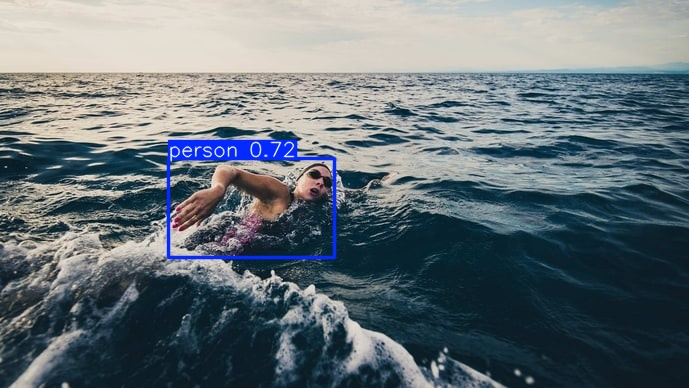

In [ ]:
from IPython.display import Image, display

# Display an image
display(Image(filename='/content/runs/detect/predict2/Fitness_Open_Water_Swimming_1659434384681_1659434407945_1659434407945.jpg'))


# 2. Val
Validate a model's accuracy on the [COCO](https://docs.ultralytics.com/datasets/detect/coco/) dataset's `val` or `test` splits. The latest YOLO11 [models](https://github.com/ultralytics/ultralytics#models) are downloaded automatically the first time they are used. See [YOLO11 Val Docs](https://docs.ultralytics.com/modes/val/) for more information.

In [ ]:
# Download COCO val
import torch
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')  # download (780M - 5000 images)
!unzip -q tmp.zip -d datasets && rm tmp.zip  # unzip

In [ ]:
# Validate YOLO11n on COCO8 val
!yolo val model=yolo11n.pt data=coco8.yaml

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cpu CPU (Intel Xeon 2.00GHz)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs
val: Scanning /content/datasets/coco8/labels/val.cache... 4 images, 0 backgrounds, 0 corrupt: 100% 4/4 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  4.57it/s]
                   all          4         17       0.57       0.85      0.847      0.632
                person          3         10      0.557        0.6      0.585      0.272
                   dog          1          1      0.548          1      0.995      0.697
                 horse          1          2      0.531          1      0.995      0.674
              elephant          1          2      0.371        0.5      0.516      0.256
              umbrella          1          1      0.569          1      0.995      0.995
          potted plant          1          1      0.847       

# 3. Train

<p align=""><a href="https://ultralytics.com/hub"><img width="1000" src="https://github.com/ultralytics/assets/raw/main/yolov8/banner-integrations.png"/></a></p>

Train YOLO11 on [Detect](https://docs.ultralytics.com/tasks/detect/), [Segment](https://docs.ultralytics.com/tasks/segment/), [Classify](https://docs.ultralytics.com/tasks/classify/) and [Pose](https://docs.ultralytics.com/tasks/pose/) datasets. See [YOLO11 Train Docs](https://docs.ultralytics.com/modes/train/) for more information.

In [ ]:
#@title Select YOLO11 🚀 logger {run: 'auto'}
logger = 'Comet' #@param ['Comet', 'TensorBoard']

if logger == 'Comet':
  %pip install -q comet_ml
  import comet_ml; comet_ml.init()
elif logger == 'TensorBoard':
  %load_ext tensorboard
  %tensorboard --logdir .

COMET WARNING: comet_ml.init() is deprecated and will be removed soon. Please use comet_ml.login()


### Download dataset from roboflow

In [ ]:
!pip install roboflow

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="31LzRIsGrdtRzoGuITTN")
project = rf.workspace("ntnu-2wibj").project("seadronessee-odv2")
version = project.version(11)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to SeaDronesSee-ODV2-11 in yolov11:: 100%|██████████| 62884/62884 [00:23<00:00, 2681.80it/s]


In [ ]:
# Train YOLO11n on COCO8 for 3 epochs
!yolo train model=yolo11n.pt data="/content/SeaDronesSee-ODV2-11/data.yaml" epochs=3 imgsz=640

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cpu CPU (Intel Xeon 2.00GHz)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/SeaDronesSee-ODV2-11/data.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sho

# 4. Export

Export a YOLO11 model to any supported format below with the `format` argument, i.e. `format=onnx`. See [YOLO11 Export Docs](https://docs.ultralytics.com/modes/export/) for more information.

- 💡 ProTip: Export to [ONNX](https://docs.ultralytics.com/integrations/onnx/) or [OpenVINO](https://docs.ultralytics.com/integrations/openvino/) for up to 3x CPU speedup.  
- 💡 ProTip: Export to [TensorRT](https://docs.ultralytics.com/integrations/tensorrt/) for up to 5x GPU speedup.

| Format                                                                   | `format` Argument | Model                     | Metadata | Arguments                                                            |
|--------------------------------------------------------------------------|-------------------|---------------------------|----------|----------------------------------------------------------------------|
| [PyTorch](https://pytorch.org/)                                          | -                 | `yolo11n.pt`              | ✅        | -                                                                    |
| [TorchScript](https://docs.ultralytics.com/integrations/torchscript)     | `torchscript`     | `yolo11n.torchscript`     | ✅        | `imgsz`, `optimize`, `batch`                                         |
| [ONNX](https://docs.ultralytics.com/integrations/onnx)                   | `onnx`            | `yolo11n.onnx`            | ✅        | `imgsz`, `half`, `dynamic`, `simplify`, `opset`, `batch`             |
| [OpenVINO](https://docs.ultralytics.com/integrations/openvino)           | `openvino`        | `yolo11n_openvino_model/` | ✅        | `imgsz`, `half`, `dynamic`, `int8`, `batch`                          |
| [TensorRT](https://docs.ultralytics.com/integrations/tensorrt)           | `engine`          | `yolo11n.engine`          | ✅        | `imgsz`, `half`, `dynamic`, `simplify`, `workspace`, `int8`, `batch` |
| [CoreML](https://docs.ultralytics.com/integrations/coreml)               | `coreml`          | `yolo11n.mlpackage`       | ✅        | `imgsz`, `half`, `int8`, `nms`, `batch`                              |
| [TF SavedModel](https://docs.ultralytics.com/integrations/tf-savedmodel) | `saved_model`     | `yolo11n_saved_model/`    | ✅        | `imgsz`, `keras`, `int8`, `batch`                                    |
| [TF GraphDef](https://docs.ultralytics.com/integrations/tf-graphdef)     | `pb`              | `yolo11n.pb`              | ❌        | `imgsz`, `batch`                                                     |
| [TF Lite](https://docs.ultralytics.com/integrations/tflite)              | `tflite`          | `yolo11n.tflite`          | ✅        | `imgsz`, `half`, `int8`, `batch`                                     |
| [TF Edge TPU](https://docs.ultralytics.com/integrations/edge-tpu)        | `edgetpu`         | `yolo11n_edgetpu.tflite`  | ✅        | `imgsz`                                                              |
| [TF.js](https://docs.ultralytics.com/integrations/tfjs)                  | `tfjs`            | `yolo11n_web_model/`      | ✅        | `imgsz`, `half`, `int8`, `batch`                                     |
| [PaddlePaddle](https://docs.ultralytics.com/integrations/paddlepaddle)   | `paddle`          | `yolo11n_paddle_model/`   | ✅        | `imgsz`, `batch`                                                     |
| [MNN](https://docs.ultralytics.com/integrations/mnn)                     | `mnn`             | `yolo11n.mnn`             | ✅        | `imgsz`, `batch`, `int8`, `half`                                     |
| [NCNN](https://docs.ultralytics.com/integrations/ncnn)                   | `ncnn`            | `yolo11n_ncnn_model/`     | ✅        | `imgsz`, `half`, `batch`                                             |
| [IMX500](https://docs.ultralytics.com/integrations/sony-imx500)          | `imx`             | `yolov8n_imx_model/`      | ✅        | `imgsz`, `int8`                                                      |

In [ ]:
!yolo export model=yolo11n.pt format=torchscript

Ultralytics 8.3.2 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

PyTorch: starting from 'yolo11n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (5.4 MB)

TorchScript: starting export with torch 2.4.1+cu121...
TorchScript: export success ✅ 2.4s, saved as 'yolo11n.torchscript' (10.5 MB)

Export complete (4.2s)
Results saved to /content
Predict:         yolo predict task=detect model=yolo11n.torchscript imgsz=640  
Validate:        yolo val task=detect model=yolo11n.torchscript imgsz=640 data=coco.yaml  
Visualize:       https://netron.app
💡 Learn more at https://docs.ultralytics.com/modes/export


# 5. Python Usage

YOLO11 was reimagined using Python-first principles for the most seamless Python YOLO experience yet. YOLO11 models can be loaded from a trained checkpoint or created from scratch. Then methods are used to train, val, predict, and export the model. See detailed Python usage examples in the [YOLO11 Python Docs](https://docs.ultralytics.com/usage/python/).

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolo11n.yaml')  # build a new model from scratch
model = YOLO('yolo11n.pt')  # load a pretrained model (recommended for training)

# Use the model
results = model.train(data='coco8.yaml', epochs=3)  # train the model
results = model.val()  # evaluate model performance on the validation set
results = model('https://ultralytics.com/images/bus.jpg')  # predict on an image
results = model.export(format='onnx')  # export the model to ONNX format

# 6. Tasks

YOLO11 can train, val, predict and export models for the most common tasks in vision AI: [Detect](https://docs.ultralytics.com/tasks/detect/), [Segment](https://docs.ultralytics.com/tasks/segment/), [Classify](https://docs.ultralytics.com/tasks/classify/) and [Pose](https://docs.ultralytics.com/tasks/pose/). See [YOLO11 Tasks Docs](https://docs.ultralytics.com/tasks/) for more information.

## 1. Detection

YOLO11 _detection_ models have no suffix and are the default YOLO11 models, i.e. `yolo11n.pt` and are pretrained on COCO. See [Detection Docs](https://docs.ultralytics.com/tasks/detect/) for full details.


In [54]:
# Load YOLO11n, train it on COCO128 for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolo11n.pt')  # load a pretrained YOLO detection model
model.train(data='coco8.yaml', epochs=3)  # train the model
model('https://ultralytics.com/images/bus.jpg')  # predict on an image

Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cpu CPU (Intel Xeon 2.00GHz)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=coco8.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=Non

train: Scanning /content/datasets/coco8/labels/train.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]
val: Scanning /content/datasets/coco8/labels/val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]

Plotting labels to runs/detect/train3/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train3
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G      1.335      2.868      1.642         22        640: 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]

                   all          4         17      0.575       0.85      0.878      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3         0G      1.204      2.694      1.511         23        640: 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]

                   all          4         17      0.564       0.85      0.849      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3         0G      1.165      3.632      1.574         16        640: 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]

                   all          4         17      0.559       0.85      0.851      0.616



3 epochs completed in 0.003 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 5.5MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cpu CPU (Intel Xeon 2.00GHz)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.27it/s]


                   all          4         17      0.573       0.85      0.878      0.635
                person          3         10      0.563        0.6      0.594      0.273
                   dog          1          1      0.547          1      0.995      0.697
                 horse          1          2      0.541          1      0.995      0.674
              elephant          1          2       0.37        0.5      0.695      0.275
              umbrella          1          1       0.57          1      0.995      0.995
          potted plant          1          1      0.849          1      0.995      0.895
Speed: 0.4ms preprocess, 40.0ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train3

Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 107.5ms
Speed: 2.5ms preprocess, 107.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [55]:
# Predict on an image and save the results
results = model('https://ultralytics.com/images/bus.jpg', save=True)


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 56.2ms
Speed: 2.6ms preprocess, 56.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/train32


In [56]:
boxes = results[0].boxes

In [57]:
boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([5., 0., 0., 0., 0.])
conf: tensor([0.9400, 0.8894, 0.8790, 0.8564, 0.6224])
data: tensor([[2.0339e+01, 2.3046e+02, 8.0675e+02, 7.3536e+02, 9.4001e-01, 5.0000e+00],
        [6.7102e+02, 3.9477e+02, 8.0981e+02, 8.7862e+02, 8.8937e-01, 0.0000e+00],
        [4.7290e+01, 3.9953e+02, 2.3933e+02, 9.0421e+02, 8.7903e-01, 0.0000e+00],
        [2.2314e+02, 4.0866e+02, 3.4444e+02, 8.6034e+02, 8.5642e-01, 0.0000e+00],
        [2.2910e-02, 5.5606e+02, 6.8965e+01, 8.7221e+02, 6.2240e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (1080, 810)
shape: torch.Size([5, 6])
xywh: tensor([[413.5466, 482.9084, 786.4153, 504.9009],
        [740.4146, 636.6981, 138.7874, 483.8490],
        [143.3108, 651.8734, 192.0422, 504.6819],
        [283.7894, 634.4973, 121.3018, 451.6829],
        [ 34.4941, 714.1304,  68.9424, 316.1498]])
xywhn: tensor([[0.5106, 0.4471, 0.9709, 0.4675],
        [0.9141, 0.5895, 0.1713, 0.4480],
        [0.17

In [58]:
boxes.xyxy

tensor([[2.0339e+01, 2.3046e+02, 8.0675e+02, 7.3536e+02],
        [6.7102e+02, 3.9477e+02, 8.0981e+02, 8.7862e+02],
        [4.7290e+01, 3.9953e+02, 2.3933e+02, 9.0421e+02],
        [2.2314e+02, 4.0866e+02, 3.4444e+02, 8.6034e+02],
        [2.2910e-02, 5.5606e+02, 6.8965e+01, 8.7221e+02]])

In [59]:
boxes.conf

tensor([0.9400, 0.8894, 0.8790, 0.8564, 0.6224])

In [60]:
boxes.cls

tensor([5., 0., 0., 0., 0.])

### Coco Dataset Classes :

- 0: person  
- 1: bicycle  
- 2: car  
- 3: motorcycle  
- 4: airplane  
- 5: bus  
- 6: train  
- 7: truck  
- 8: boat  
- 9: traffic light  
- 10: fire hydrant  
- 11: stop sign  
- 12: parking meter  
- 13: bench  
- 14: bird  
- 15: cat  
- 16: dog  
- 17: horse  
- 18: sheep  
- 19: cow  
- 20: elephant  
- 21: bear  
- 22: zebra  
- 23: giraffe  
- 24: backpack  
- 25: umbrella  
- 26: handbag  
- 27: tie  
- 28: suitcase  
- 29: frisbee  
- 30: skis  
- 31: snowboard  
- 32: sports ball  
- 33: kite  
- 34: baseball bat  
- 35: baseball glove  
- 36: skateboard  
- 37: surfboard  
- 38: tennis racket  
- 39: bottle  
- 40: wine glass  
- 41: cup  
- 42: fork  
- 43: knife  
- 44: spoon  
- 45: bowl  
- 46: banana  
- 47: apple  
- 48: sandwich  
- 49: orange  
- 50: broccoli  
- 51: carrot  
- 52: hot dog  
- 53: pizza  
- 54: donut  
- 55: cake  
- 56: chair  
- 57: couch  
- 58: potted plant  
- 59: bed  
- 60: dining table  
- 61: toilet  
- 62: tv  
- 63: laptop  
- 64: mouse  
- 65: remote  
- 66: keyboard  
- 67: cell phone  
- 68: microwave  
- 69: oven  
- 70: toaster  
- 71: sink  
- 72: refrigerator  
- 73: book  
- 74: clock  
- 75: vase  
- 76: scissors  
- 77: teddy bear  
- 78: hair drier  
- 79: toothbrush  

In [61]:
boxes.data

tensor([[2.0339e+01, 2.3046e+02, 8.0675e+02, 7.3536e+02, 9.4001e-01, 5.0000e+00],
        [6.7102e+02, 3.9477e+02, 8.0981e+02, 8.7862e+02, 8.8937e-01, 0.0000e+00],
        [4.7290e+01, 3.9953e+02, 2.3933e+02, 9.0421e+02, 8.7903e-01, 0.0000e+00],
        [2.2314e+02, 4.0866e+02, 3.4444e+02, 8.6034e+02, 8.5642e-01, 0.0000e+00],
        [2.2910e-02, 5.5606e+02, 6.8965e+01, 8.7221e+02, 6.2240e-01, 0.0000e+00]])

In [62]:
boxes.xywh

tensor([[413.5466, 482.9084, 786.4153, 504.9009],
        [740.4146, 636.6981, 138.7874, 483.8490],
        [143.3108, 651.8734, 192.0422, 504.6819],
        [283.7894, 634.4973, 121.3018, 451.6829],
        [ 34.4941, 714.1304,  68.9424, 316.1498]])

In [6]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [7]:
results[0]

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant',

In [8]:
results[0].save_dir

'runs/detect/train2'

In [12]:
from PIL import Image
image = Image.open("/content/runs/detect/train2/bus.jpg")

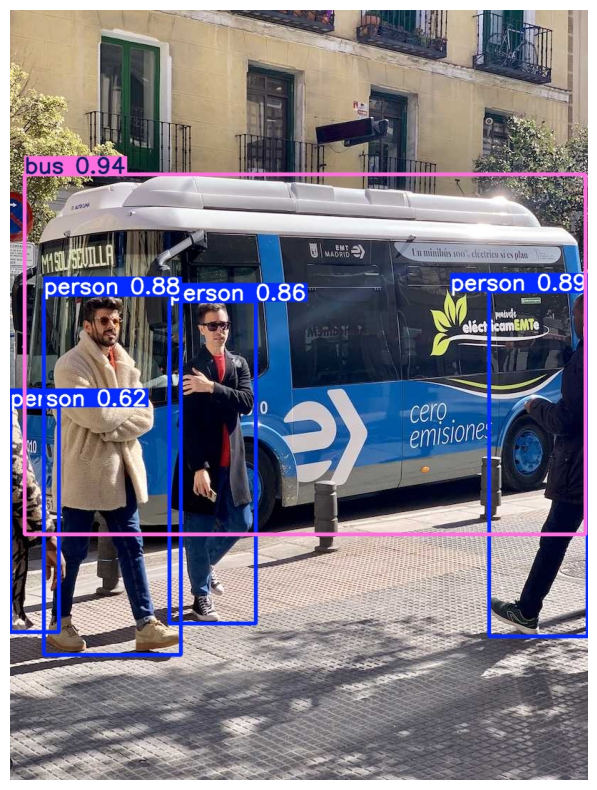

In [13]:
import matplotlib.pyplot as plt
# Plot the image
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

## 2. Segmentation

YOLO11 _segmentation_ models use the `-seg` suffix, i.e. `yolo11n-seg.pt` and are pretrained on COCO. See [Segmentation Docs](https://docs.ultralytics.com/tasks/segment/) for full details.


In [14]:
# Load YOLO11n-seg, train it on COCO128-seg for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolo11n-seg.pt')  # load a pretrained YOLO segmentation model
model.train(data='coco8-seg.yaml', epochs=3)  # train the model
# Predict on an image and save the results
results = model('https://ultralytics.com/images/bus.jpg', save=True)

100%|██████████| 5.90M/5.90M [00:00<00:00, 73.3MB/s]


Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cpu CPU (Intel Xeon 2.00GHz)
engine/trainer: task=segment, mode=train, model=yolo11n-seg.pt, data=coco8-seg.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_w

100%|██████████| 439k/439k [00:00<00:00, 9.95MB/s]
Unzipping /content/datasets/coco8-seg.zip to /content/datasets/coco8-seg...: 100%|██████████| 25/25 [00:00<00:00, 3817.45file/s]

Dataset download success ✅ (0.5s), saved to /content/datasets


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1 

YOLO11n-seg summary: 355 layers, 2,876,848 parameters, 2,876,832 gradients, 10.5 GFLOPs

Transferred 561/561 items from pretrained weights
TensorBoard: Start with 'tensorboard --logdir runs/segment/train', view at http://localhost:6006/
Freezing layer 'model.23.dfl.conv.weight'


train: Scanning /content/datasets/coco8-seg/labels/train... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 668.44it/s]

train: New cache created: /content/datasets/coco8-seg/labels/train.cache



val: Scanning /content/datasets/coco8-seg/labels/val... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 1151.96it/s]

val: New cache created: /content/datasets/coco8-seg/labels/val.cache
Plotting labels to runs/segment/train/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/segment/train
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G      1.013       2.84      2.519      1.322         25        640: 100%|██████████| 1/1 [00:00<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all          4         17      0.781      0.893       0.94      0.669      0.721      0.833      0.821       0.56



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        2/3         0G      1.299      2.576       2.64      1.451         23        640: 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all          4         17      0.776      0.893      0.938      0.668      0.716      0.833      0.821      0.563



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        3/3         0G     0.7367      2.302      3.149      1.191         15        640: 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]

                   all          4         17      0.777      0.906      0.939      0.663      0.715      0.844      0.821      0.564



3 epochs completed in 0.003 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 6.1MB
Optimizer stripped from runs/segment/train/weights/best.pt, 6.1MB

Validating runs/segment/train/weights/best.pt...
Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cpu CPU (Intel Xeon 2.00GHz)
YOLO11n-seg summary (fused): 265 layers, 2,868,664 parameters, 0 gradients, 10.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]


                   all          4         17      0.775      0.893      0.938      0.668      0.715      0.833      0.821      0.563
                person          3         10      0.717        0.5      0.656       0.31      0.717        0.5      0.612      0.242
                   dog          1          1      0.732          1      0.995      0.895      0.732          1      0.995      0.895
                 horse          1          2      0.612          1      0.995      0.581      0.612          1      0.828        0.2
              elephant          1          2          1      0.861      0.995      0.332      0.639        0.5      0.501       0.25
              umbrella          1          1      0.665          1      0.995      0.995      0.665          1      0.995      0.895
          potted plant          1          1      0.926          1      0.995      0.895      0.926          1      0.995      0.895
Speed: 0.4ms preprocess, 45.5ms inference, 0.0ms loss, 1.4ms postproc

In [17]:
len(results)

1

In [16]:
results[0]

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair

## 3. Classification

YOLO11 _classification_ models use the `-cls` suffix, i.e. `yolo11n-cls.pt` and are pretrained on ImageNet. See [Classification Docs](https://docs.ultralytics.com/tasks/classify/) for full details.


In [18]:
# Load YOLO11n-cls, train it on mnist160 for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolo11n-cls.pt')  # load a pretrained YOLO classification model
model.train(data='mnist160', epochs=3)  # train the model
results = model('https://ultralytics.com/images/bus.jpg', save=True)

100%|██████████| 5.52M/5.52M [00:00<00:00, 68.6MB/s]


Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cpu CPU (Intel Xeon 2.00GHz)
engine/trainer: task=classify, mode=train, model=yolo11n-cls.pt, data=mnist160, epochs=3, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=

100%|██████████| 70.0k/70.0k [00:00<00:00, 3.48MB/s]
Unzipping /content/datasets/mnist160.zip to /content/datasets/mnist160...: 100%|██████████| 184/184 [00:00<00:00, 9583.53file/s]

Dataset download success ✅ (0.5s), saved to /content/datasets/mnist160

train: /content/datasets/mnist160/train... found 80 images in 10 classes ✅ 
val: None...
test: /content/datasets/mnist160/test... found 80 images in 10 classes ✅ 
Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ult


train: Scanning /content/datasets/mnist160/train... 80 images, 0 corrupt: 100%|██████████| 80/80 [00:00<00:00, 2706.24it/s]

train: New cache created: /content/datasets/mnist160/train.cache



val: Scanning /content/datasets/mnist160/test... 80 images, 0 corrupt: 100%|██████████| 80/80 [00:00<00:00, 3503.28it/s]


val: New cache created: /content/datasets/mnist160/test.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 0 dataloader workers
Logging results to runs/classify/train
Starting training for 3 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.87it/s]

                   all      0.112      0.488



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.34it/s]

                   all      0.125      0.475



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.59it/s]

                   all      0.075      0.538



3 epochs completed in 0.002 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.2MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.2MB

Validating runs/classify/train/weights/best.pt...
Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cpu CPU (Intel Xeon 2.00GHz)
YOLO11n-cls summary (fused): 112 layers, 1,538,834 parameters, 0 gradients, 3.2 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/datasets/mnist160/train... found 80 images in 10 classes ✅ 
val: None...
test: /content/datasets/mnist160/test... found 80 images in 10 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.42it/s]


                   all      0.075      0.538
Speed: 0.0ms preprocess, 2.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train

Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 224x224 6 0.31, 9 0.15, 5 0.13, 0 0.11, 8 0.09, 21.8ms
Speed: 9.4ms preprocess, 21.8ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/train2


In [19]:
results[0]

ultralytics.engine.results.Results object with attributes:

boxes: None
keypoints: None
masks: None
names: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9'}
obb: None
orig_img: array([[[119, 146, 172],
        [121, 148, 174],
        [122, 152, 177],
        ...,
        [161, 171, 188],
        [160, 170, 187],
        [160, 170, 187]],

       [[120, 147, 173],
        [122, 149, 175],
        [123, 153, 178],
        ...,
        [161, 171, 188],
        [160, 170, 187],
        [160, 170, 187]],

       [[123, 150, 176],
        [124, 151, 177],
        [125, 155, 180],
        ...,
        [161, 171, 188],
        [160, 170, 187],
        [160, 170, 187]],

       ...,

       [[183, 182, 186],
        [179, 178, 182],
        [180, 179, 183],
        ...,
        [121, 111, 117],
        [113, 103, 109],
        [115, 105, 111]],

       [[165, 164, 168],
        [173, 172, 176],
        [187, 186, 190],
        ...,
        [102,  92,  98],
      

In [21]:
type(results[0])

ultralytics.engine.results.Results

In [24]:
# Display detailed attributes
print("Attributes of results:")
for attr in dir(results[0]):
    print(attr)

Attributes of results:
__class__
__delattr__
__dict__
__dir__
__doc__
__eq__
__format__
__ge__
__getattr__
__getattribute__
__getitem__
__gt__
__hash__
__init__
__init_subclass__
__le__
__len__
__lt__
__module__
__ne__
__new__
__reduce__
__reduce_ex__
__repr__
__setattr__
__sizeof__
__str__
__subclasshook__
__weakref__
_apply
_keys
boxes
cpu
cuda
keypoints
masks
names
new
numpy
obb
orig_img
orig_shape
path
plot
probs
save
save_crop
save_dir
save_txt
show
speed
summary
to
to_csv
to_df
to_json
to_xml
tojson
update
verbose


In [25]:
# Iterate over each result in the results object
for i, result in enumerate(results):
    print(f"\nInspecting Result {i + 1}:")

    # Iterate over the attributes of each result
    for attr_name in dir(result):
        # Skip special attributes (those starting with '__')
        if attr_name.startswith('__'):
            continue

        # Get the attribute itself
        attr = getattr(result, attr_name)

        # Check if it's callable (a method or function)
        if callable(attr):
            print(f"  '{attr_name}' is a method or function.")
        # Check if it's a property
        elif isinstance(attr, property):
            print(f"  '{attr_name}' is a property.")
        else:
            print(f"  '{attr_name}' is a regular attribute.")


Inspecting Result 1:
  '_apply' is a method or function.
  '_keys' is a regular attribute.
  'boxes' is a regular attribute.
  'cpu' is a method or function.
  'cuda' is a method or function.
  'keypoints' is a regular attribute.
  'masks' is a regular attribute.
  'names' is a regular attribute.
  'new' is a method or function.
  'numpy' is a method or function.
  'obb' is a regular attribute.
  'orig_img' is a regular attribute.
  'orig_shape' is a regular attribute.
  'path' is a regular attribute.
  'plot' is a method or function.
  'probs' is a regular attribute.
  'save' is a method or function.
  'save_crop' is a method or function.
  'save_dir' is a regular attribute.
  'save_txt' is a method or function.
  'show' is a method or function.
  'speed' is a regular attribute.
  'summary' is a method or function.
  'to' is a method or function.
  'to_csv' is a method or function.
  'to_df' is a method or function.
  'to_json' is a method or function.
  'to_xml' is a method or funct

In [26]:
results[0]._keys

('boxes', 'masks', 'probs', 'keypoints', 'obb')

In [27]:
results[0][2]

ultralytics.engine.results.Results object with attributes:

boxes: None
keypoints: None
masks: None
names: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9'}
obb: None
orig_img: array([[[119, 146, 172],
        [121, 148, 174],
        [122, 152, 177],
        ...,
        [161, 171, 188],
        [160, 170, 187],
        [160, 170, 187]],

       [[120, 147, 173],
        [122, 149, 175],
        [123, 153, 178],
        ...,
        [161, 171, 188],
        [160, 170, 187],
        [160, 170, 187]],

       [[123, 150, 176],
        [124, 151, 177],
        [125, 155, 180],
        ...,
        [161, 171, 188],
        [160, 170, 187],
        [160, 170, 187]],

       ...,

       [[183, 182, 186],
        [179, 178, 182],
        [180, 179, 183],
        ...,
        [121, 111, 117],
        [113, 103, 109],
        [115, 105, 111]],

       [[165, 164, 168],
        [173, 172, 176],
        [187, 186, 190],
        ...,
        [102,  92,  98],
      

In [32]:
results[0].probs

ultralytics.engine.results.Probs object with attributes:

data: tensor([0.1080, 0.0546, 0.0429, 0.0392, 0.0463, 0.1267, 0.3129, 0.0281, 0.0883, 0.1530])
orig_shape: None
shape: torch.Size([10])
top1: 6
top1conf: tensor(0.3129)
top5: [6, 9, 5, 0, 8]
top5conf: tensor([0.3129, 0.1530, 0.1267, 0.1080, 0.0883])

In [34]:
dir(results[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_keys',
 'boxes',
 'cpu',
 'cuda',
 'keypoints',
 'masks',
 'names',
 'new',
 'numpy',
 'obb',
 'orig_img',
 'orig_shape',
 'path',
 'plot',
 'probs',
 'save',
 'save_crop',
 'save_dir',
 'save_txt',
 'show',
 'speed',
 'summary',
 'to',
 'to_csv',
 'to_df',
 'to_json',
 'to_xml',
 'tojson',
 'update',
 'verbose']

In [39]:
for i, result in enumerate(results):
    print(f"\nResult[0] {i + 1}:")


Result[0] 1:


In [40]:
results[0].names

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9'}

In [41]:
results[0].probs

ultralytics.engine.results.Probs object with attributes:

data: tensor([0.1080, 0.0546, 0.0429, 0.0392, 0.0463, 0.1267, 0.3129, 0.0281, 0.0883, 0.1530])
orig_shape: None
shape: torch.Size([10])
top1: 6
top1conf: tensor(0.3129)
top5: [6, 9, 5, 0, 8]
top5conf: tensor([0.3129, 0.1530, 0.1267, 0.1080, 0.0883])

In [43]:
class_names = model.names

for label, class_name in enumerate(class_names):
    print(f"Label {label}: {class_name}")

Label 0: 0
Label 1: 1
Label 2: 2
Label 3: 3
Label 4: 4
Label 5: 5
Label 6: 6
Label 7: 7
Label 8: 8
Label 9: 9


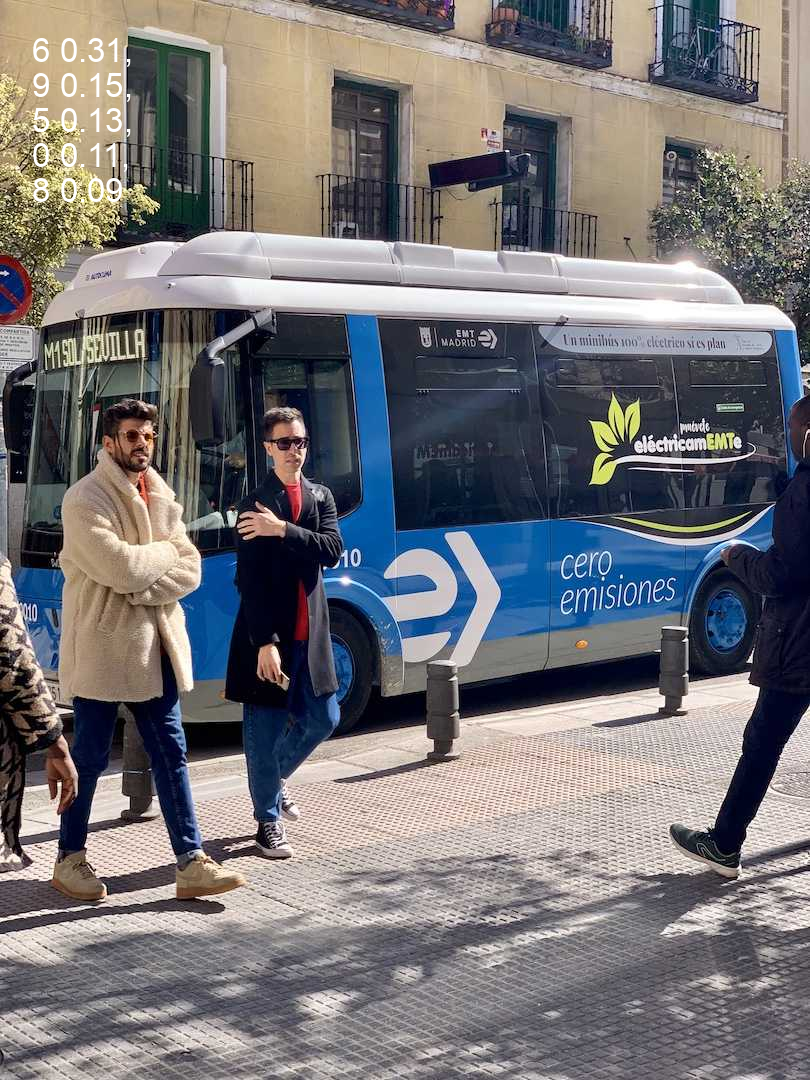

In [44]:
# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen
    result.save(filename="result.jpg")  # save to disk

In [45]:
probs

ultralytics.engine.results.Probs object with attributes:

data: tensor([0.1080, 0.0546, 0.0429, 0.0392, 0.0463, 0.1267, 0.3129, 0.0281, 0.0883, 0.1530])
orig_shape: None
shape: torch.Size([10])
top1: 6
top1conf: tensor(0.3129)
top5: [6, 9, 5, 0, 8]
top5conf: tensor([0.3129, 0.1530, 0.1267, 0.1080, 0.0883])

In [49]:
boxes = results[0].boxes

In [51]:
type(boxes)

NoneType

## 4. Pose

YOLO11 _pose_ models use the `-pose` suffix, i.e. `yolo11n-pose.pt` and are pretrained on COCO Keypoints. See [Pose Docs](https://docs.ultralytics.com/tasks/pose/) for full details.

In [63]:
# Load YOLO11n-pose, train it on COCO8-pose for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolo11n-pose.pt')  # load a pretrained YOLO pose model
model.train(data='coco8-pose.yaml', epochs=3)  # train the model
model('https://ultralytics.com/images/bus.jpg')  # predict on an image

100%|██████████| 5.97M/5.97M [00:00<00:00, 72.8MB/s]


Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cpu CPU (Intel Xeon 2.00GHz)
engine/trainer: task=pose, mode=train, model=yolo11n-pose.pt, data=coco8-pose.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_wi

100%|██████████| 334k/334k [00:00<00:00, 8.43MB/s]
Unzipping /content/datasets/coco8-pose.zip to /content/datasets/coco8-pose...: 100%|██████████| 27/27 [00:00<00:00, 4963.24file/s]

Dataset download success ✅ (0.5s), saved to /content/datasets

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, Tru

YOLO11n-pose summary: 344 layers, 2,874,462 parameters, 2,874,446 gradients, 7.5 GFLOPs

Transferred 541/541 items from pretrained weights
TensorBoard: Start with 'tensorboard --logdir runs/pose/train', view at http://localhost:6006/
Freezing layer 'model.23.dfl.conv.weight'


train: Scanning /content/datasets/coco8-pose/labels/train... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 772.33it/s]

train: New cache created: /content/datasets/coco8-pose/labels/train.cache



val: Scanning /content/datasets/coco8-pose/labels/val... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 968.16it/s]

val: New cache created: /content/datasets/coco8-pose/labels/val.cache
Plotting labels to runs/pose/train/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 87 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/pose/train
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G      1.762      2.643     0.3464       1.11      1.729          8        640: 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]

                   all          4         14      0.812      0.925      0.913      0.723          1        0.7      0.769      0.365



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


        2/3         0G      1.467      3.361     0.4119      2.056      1.353         11        640: 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

                   all          4         14      0.865      0.857      0.918      0.733          1      0.703      0.769      0.367



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


        3/3         0G      1.257      4.341     0.3823     0.9041      1.299         13        640: 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]

                   all          4         14      0.803      0.873      0.918      0.728          1      0.697      0.769      0.371



3 epochs completed in 0.003 hours.
Optimizer stripped from runs/pose/train/weights/last.pt, 6.1MB
Optimizer stripped from runs/pose/train/weights/best.pt, 6.1MB

Validating runs/pose/train/weights/best.pt...
Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cpu CPU (Intel Xeon 2.00GHz)
YOLO11n-pose summary (fused): 257 layers, 2,866,468 parameters, 0 gradients, 7.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]


                   all          4         14      0.857      0.857      0.917      0.733          1      0.703      0.769      0.367
Speed: 0.5ms preprocess, 42.3ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/pose/train

Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 640x480 4 persons, 73.9ms
Speed: 2.4ms preprocess, 73.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: ultralytics.engine.results.Keypoints object
 masks: None
 names: {0: 'person'}
 obb: None
 orig_img: array([[[119, 146, 172],
         [121, 148, 174],
         [122, 152, 177],
         ...,
         [161, 171, 188],
         [160, 170, 187],
         [160, 170, 187]],
 
        [[120, 147, 173],
         [122, 149, 175],
         [123, 153, 178],
         ...,
         [161, 171, 188],
         [160, 170, 187],
         [160, 170, 187]],
 
        [[123, 150, 176],
         [124, 151, 177],
         [125, 155, 180],
         ...,
         [161, 171, 188],
         [160, 170, 187],
         [160, 170, 187]],
 
        ...,
 
        [[183, 182, 186],
         [179, 178, 182],
         [180, 179, 183],
         ...,
         [121, 111, 117],
         [113, 103, 109],
         [115, 105, 111]],
 
        [[165, 164, 168],
         [173, 172, 176],
         [187, 186,

In [64]:
results = model('https://ultralytics.com/images/bus.jpg', save = True)  # predict on an image


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 640x480 4 persons, 62.1ms
Speed: 3.0ms preprocess, 62.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/pose/train2


## 4. Oriented Bounding Boxes (OBB)

YOLO11 _OBB_ models use the `-obb` suffix, i.e. `yolo11n-obb.pt` and are pretrained on the DOTA dataset. See [OBB Docs](https://docs.ultralytics.com/tasks/obb/) for full details.

In [65]:
# Load YOLO11n-obb, train it on DOTA8 for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolo11n-obb.pt')  # load a pretrained YOLO OBB model
model.train(data='dota8.yaml', epochs=3)  # train the model
results = model('https://ultralytics.com/images/boats.jpg', save = True)  # predict on an image

100%|██████████| 5.53M/5.53M [00:00<00:00, 68.4MB/s]


Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cpu CPU (Intel Xeon 2.00GHz)
engine/trainer: task=obb, mode=train, model=yolo11n-obb.pt, data=dota8.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=No

100%|██████████| 1.24M/1.24M [00:00<00:00, 20.7MB/s]
Unzipping /content/datasets/dota8.zip to /content/datasets/dota8...: 100%|██████████| 27/27 [00:00<00:00, 1885.87file/s]

Dataset download success ✅ (0.5s), saved to /content/datasets

Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, Tr

YOLO11n-obb summary: 344 layers, 2,664,432 parameters, 2,664,416 gradients, 6.7 GFLOPs

Transferred 541/541 items from pretrained weights
TensorBoard: Start with 'tensorboard --logdir runs/obb/train', view at http://localhost:6006/
Freezing layer 'model.23.dfl.conv.weight'


train: Scanning /content/datasets/dota8/labels/train... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 721.97it/s]

train: New cache created: /content/datasets/dota8/labels/train.cache



val: Scanning /content/datasets/dota8/labels/val... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 1204.91it/s]

val: New cache created: /content/datasets/dota8/labels/val.cache
Plotting labels to runs/obb/train/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 87 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1024 train, 1024 val
Using 0 dataloader workers
Logging results to runs/obb/train
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G     0.8315      0.516      1.558        142       1024: 100%|██████████| 1/1 [00:02<00:00,  2.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]

                   all          4          8      0.946          1      0.995      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3         0G     0.8107      0.571      1.526        176       1024: 100%|██████████| 1/1 [00:01<00:00,  1.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all          4          8      0.948          1      0.995      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3         0G     0.7581     0.8049      1.485         14       1024: 100%|██████████| 1/1 [00:01<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all          4          8      0.946          1      0.995      0.804



3 epochs completed in 0.004 hours.
Optimizer stripped from runs/obb/train/weights/last.pt, 6.1MB
Optimizer stripped from runs/obb/train/weights/best.pt, 6.1MB

Validating runs/obb/train/weights/best.pt...
Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cpu CPU (Intel Xeon 2.00GHz)
YOLO11n-obb summary (fused): 257 layers, 2,656,648 parameters, 0 gradients, 6.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]


                   all          4          8      0.946          1      0.995      0.804
      baseball diamond          3          4      0.897          1      0.995       0.85
      basketball court          1          3      0.977          1      0.995      0.866
     soccer ball field          1          1      0.965          1      0.995      0.697
Speed: 1.2ms preprocess, 79.2ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/obb/train



100%|██████████| 190k/190k [00:00<00:00, 5.66MB/s]


image 1/1 /content/boats.jpg: 576x1024 126.5ms
Speed: 4.8ms preprocess, 126.5ms inference, 33.6ms postprocess per image at shape (1, 3, 576, 1024)
Results saved to runs/obb/train2
